In [1]:
import stlearn as st
from pathlib import Path
import pandas as pd
import sys

In [2]:
file = Path("../stimage").resolve()
parent= file.parent
sys.path.append(str(parent))

In [3]:
from stimage.utils import gene_plot, Read10X, ReadOldST
from stimage.model import negative_binomial_layer, negative_binomial_loss, CNN_NB_model

In [4]:
BASE_PATH = Path("/scratch/imb/Xiao/unet")
TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
SAMPLE = "Sample1"
Sample1 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample1_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample1.obs["f_index"] = Sample1.obs["imagerow"].astype(str) + "-" + Sample1.obs["imagecol"].astype(str)
Sample1_features = Sample1_features.reindex(Sample1.obs["f_index"])
Sample1_features.index = Sample1.obs_names
Sample1.obsm["features"] = Sample1_features

Added tissue image to the object!


In [6]:
SAMPLE = "Sample2"
Sample2 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample2_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample2.obs["f_index"] = Sample2.obs["imagerow"].astype(str) + "-" + Sample2.obs["imagecol"].astype(str)
Sample2_features = Sample2_features.reindex(Sample2.obs["f_index"])
Sample2_features.index = Sample2.obs_names
Sample2.obsm["features"] = Sample2_features

Added tissue image to the object!


In [7]:
SAMPLE = "Sample3"
Sample3 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample3_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample3.obs["f_index"] = Sample3.obs["imagerow"].astype(str) + "-" + Sample3.obs["imagecol"].astype(str)
Sample3_features = Sample3_features.reindex(Sample3.obs["f_index"])
Sample3_features.index = Sample3.obs_names
Sample3.obsm["features"] = Sample3_features

Added tissue image to the object!


In [8]:
SAMPLE = "Sample4"
Sample4 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample4_features = pd.read_csv(BASE_PATH / ("features/valid/"+SAMPLE+".csv"), index_col=0)
Sample4.obs["f_index"] = Sample4.obs["imagerow"].astype(str) + "-" + Sample4.obs["imagecol"].astype(str)
Sample4_features = Sample4_features.reindex(Sample4.obs["f_index"])
Sample4_features.index = Sample4.obs_names
Sample4.obsm["features"] = Sample4_features

Added tissue image to the object!


In [9]:
SAMPLE = "Sample5"
Sample5 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample5_features = pd.read_csv(BASE_PATH / ("features/test/"+SAMPLE+".csv"), index_col=0)
Sample5.obs["f_index"] = Sample5.obs["imagerow"].astype(str) + "-" + Sample5.obs["imagecol"].astype(str)
Sample5_features = Sample5_features.reindex(Sample5.obs["f_index"])
Sample5_features.index = Sample5.obs_names
Sample5.obsm["features"] = Sample5_features

Added tissue image to the object!


In [10]:
SAMPLE = "Sample6"
Sample6 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample6_features = pd.read_csv(BASE_PATH / ("features/test/"+SAMPLE+".csv"), index_col=0)
Sample6.obs["f_index"] = Sample6.obs["imagerow"].astype(str) + "-" + Sample6.obs["imagecol"].astype(str)
Sample6_features = Sample6_features.reindex(Sample6.obs["f_index"])
Sample6_features.index = Sample6.obs_names
Sample6.obsm["features"] = Sample6_features

Added tissue image to the object!


In [11]:
# BASE_PATH = Path("/clusterdata/uqxtan9/Xiao/STimage/dataset/TBI_visium/A1")
# TILE_PATH = BASE_PATH / "tiles"
# TILE_PATH.mkdir(parents=True, exist_ok=True)

In [12]:
# Plp1 Aqp4 ERMN Apold1 Ccl4 Reln Pdgfra Dsp
gene_list=["ENSMUSG00000031425", "ENSMUSG00000024411", "ENSMUSG00000026830", 
           "ENSMUSG00000090698", "ENSMUSG00000018930", "ENSMUSG00000042453",
           "ENSMUSG00000029231", "ENSMUSG00000054889"]
gene = gene_list[0]

In [13]:
for adata in [
    Sample1,
    Sample2,
    Sample3,
    Sample4,
    Sample5,
    Sample6,
]:
#     count_df = adata.to_df()
#     count_df[count_df <=1] = 0
#     count_df[count_df >1] = 1
#     adata.X = count_df
#     adata[:,gene_list]
#     st.pp.filter_genes(adata,min_cells=1)
#     st.pp.normalize_total(adata)
#     st.pp.log1p(adata)
#     st.pp.scale(adata)

    # pre-processing for spot image
    TILE_PATH_ = TILE_PATH / list(adata.uns["spatial"].keys())[0]
    TILE_PATH_.mkdir(parents=True, exist_ok=True)
    st.pp.tiling(adata, TILE_PATH_, crop_size=40)
    st.pp.extract_feature(adata)
    
    
    

Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   7%|▋          [ time left: 00:01 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   4%|▍          [ time left: 00:02 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   6%|▋          [ time left: 00:01 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   6%|▌          [ time left: 00:01 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   4%|▍          [ time left: 00:02 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


In [14]:
Sample1

AnnData object with n_obs × n_vars = 640 × 22108
    obs: 'imagecol', 'imagerow', 'sum_counts', 'f_index', 'tile_path'
    uns: 'spatial'
    obsm: 'spatial', 'features', 'X_tile_feature', 'X_morphology'

In [15]:
training_dataset = Sample1.concatenate(
    [Sample2, Sample3],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample1.uns["spatial"],
            Sample2.uns["spatial"],
            Sample3.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [16]:
valid_dataset = Sample4.copy()

In [17]:
test_dataset = Sample5.concatenate(
    [Sample6],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample5.uns["spatial"],
            Sample6.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,200))

In [18]:
train_X = training_dataset.obsm["X_tile_feature"]
# train_Y = scaler.fit_transform(training_dataset[:,gene].to_df())
train_Y = training_dataset[:,gene].to_df()

/scratch/imb/Xiao/.conda/envs/stimage/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [19]:
valid_X = valid_dataset.obsm["X_tile_feature"]
# valid_Y = scaler.fit_transform(valid_dataset[:,gene].to_df())
valid_Y = valid_dataset[:,gene].to_df()

In [20]:
test_X = test_dataset.obsm["X_tile_feature"]
# test_Y = scaler.fit_transform(test_dataset[:,gene].to_df())
test_Y = test_dataset[:,gene].to_df()

In [21]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
print(tf.__version__)

2.4.1


# cnn + linear

In [22]:
def build_model():
    inputs = Input(shape=(2048,))
    outputs = Dropout(0.6)(inputs)
#     outputs = Dense(512,)(outputs)
#     outputs = Dense(256, activation='relu')(inputs)
#     outputs = Dropout(0.5)(outputs)
    outputs = Dense(1, activation='linear')(inputs)
    
    model = Model(inputs=inputs, outputs=outputs)

    optimizer = tf.keras.optimizers.RMSprop(0.0001)
#     optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model

In [24]:
model = build_model()

In [25]:
EPOCHS = 500

history = model.fit(
  train_X, train_Y, batch_size=100,
  epochs=EPOCHS, validation_data = (valid_X, valid_Y), validation_batch_size = 100)

Epoch 1/500
20/20 [==============================] - 1s 37ms/step - loss: 658.3205 - mse: 658.3205 - val_loss: 199.2054 - val_mse: 199.2054
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 597.0303 - mse: 597.0303 - val_loss: 181.8050 - val_mse: 181.8050
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 560.3745 - mse: 560.3745 - val_loss: 167.2758 - val_mse: 167.2758
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 516.3219 - mse: 516.3219 - val_loss: 154.8379 - val_mse: 154.8379
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 504.2485 - mse: 504.2485 - val_loss: 145.1054 - val_mse: 145.1054
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 460.1896 - mse: 460.1896 - val_loss: 137.3918 - val_mse: 137.3918
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 454.6801 - mse: 454.6801 - val_loss: 131.6758 - val_mse: 131.6758
Epoch 8/500
20/20 [=======

20/20 [==============================] - 0s 3ms/step - loss: 298.9093 - mse: 298.9093 - val_loss: 118.7127 - val_mse: 118.7127
Epoch 118/500
20/20 [==============================] - 0s 4ms/step - loss: 272.1245 - mse: 272.1245 - val_loss: 118.5736 - val_mse: 118.5736
Epoch 119/500
20/20 [==============================] - 0s 4ms/step - loss: 295.1115 - mse: 295.1115 - val_loss: 119.0668 - val_mse: 119.0668
Epoch 120/500
20/20 [==============================] - 0s 3ms/step - loss: 273.2408 - mse: 273.2408 - val_loss: 118.9694 - val_mse: 118.9694
Epoch 121/500
20/20 [==============================] - 0s 3ms/step - loss: 262.7991 - mse: 262.7991 - val_loss: 118.9958 - val_mse: 118.9958
Epoch 122/500
20/20 [==============================] - 0s 3ms/step - loss: 277.3807 - mse: 277.3807 - val_loss: 119.2288 - val_mse: 119.2288
Epoch 123/500
20/20 [==============================] - 0s 3ms/step - loss: 252.3426 - mse: 252.3426 - val_loss: 119.4457 - val_mse: 119.4457
Epoch 124/500
20/20 [======

20/20 [==============================] - 0s 3ms/step - loss: 231.4803 - mse: 231.4803 - val_loss: 131.1940 - val_mse: 131.1940
Epoch 234/500
20/20 [==============================] - 0s 3ms/step - loss: 283.5064 - mse: 283.5064 - val_loss: 131.4081 - val_mse: 131.4081
Epoch 235/500
20/20 [==============================] - 0s 3ms/step - loss: 228.4894 - mse: 228.4894 - val_loss: 131.2854 - val_mse: 131.2854
Epoch 236/500
20/20 [==============================] - 0s 2ms/step - loss: 238.6937 - mse: 238.6937 - val_loss: 131.8092 - val_mse: 131.8092
Epoch 237/500
20/20 [==============================] - 0s 3ms/step - loss: 234.6645 - mse: 234.6645 - val_loss: 131.9617 - val_mse: 131.9617
Epoch 238/500
20/20 [==============================] - 0s 4ms/step - loss: 248.6310 - mse: 248.6310 - val_loss: 131.7751 - val_mse: 131.7751
Epoch 239/500
20/20 [==============================] - 0s 3ms/step - loss: 227.8508 - mse: 227.8508 - val_loss: 132.2323 - val_mse: 132.2323
Epoch 240/500
20/20 [======

20/20 [==============================] - 0s 3ms/step - loss: 209.6273 - mse: 209.6273 - val_loss: 137.8588 - val_mse: 137.8588
Epoch 350/500
20/20 [==============================] - 0s 2ms/step - loss: 207.9666 - mse: 207.9666 - val_loss: 137.9721 - val_mse: 137.9721
Epoch 351/500
20/20 [==============================] - 0s 3ms/step - loss: 220.9978 - mse: 220.9978 - val_loss: 137.5612 - val_mse: 137.5612
Epoch 352/500
20/20 [==============================] - 0s 4ms/step - loss: 232.6411 - mse: 232.6411 - val_loss: 137.0345 - val_mse: 137.0345
Epoch 353/500
20/20 [==============================] - 0s 4ms/step - loss: 229.3459 - mse: 229.3459 - val_loss: 137.5848 - val_mse: 137.5848
Epoch 354/500
20/20 [==============================] - 0s 4ms/step - loss: 215.8391 - mse: 215.8391 - val_loss: 138.0616 - val_mse: 138.0616
Epoch 355/500
20/20 [==============================] - 0s 3ms/step - loss: 238.0705 - mse: 238.0705 - val_loss: 137.9926 - val_mse: 137.9926
Epoch 356/500
20/20 [======

20/20 [==============================] - 0s 2ms/step - loss: 231.9797 - mse: 231.9797 - val_loss: 142.3601 - val_mse: 142.3601
Epoch 466/500
20/20 [==============================] - 0s 2ms/step - loss: 231.2166 - mse: 231.2166 - val_loss: 142.0484 - val_mse: 142.0484
Epoch 467/500
20/20 [==============================] - 0s 2ms/step - loss: 234.6316 - mse: 234.6316 - val_loss: 140.8404 - val_mse: 140.8404
Epoch 468/500
20/20 [==============================] - 0s 2ms/step - loss: 246.7597 - mse: 246.7597 - val_loss: 140.8252 - val_mse: 140.8252
Epoch 469/500
20/20 [==============================] - 0s 3ms/step - loss: 223.7863 - mse: 223.7863 - val_loss: 141.3918 - val_mse: 141.3918
Epoch 470/500
20/20 [==============================] - 0s 3ms/step - loss: 230.0004 - mse: 230.0004 - val_loss: 141.0953 - val_mse: 141.0953
Epoch 471/500
20/20 [==============================] - 0s 3ms/step - loss: 241.0330 - mse: 241.0330 - val_loss: 140.8726 - val_mse: 140.8726
Epoch 472/500
20/20 [======

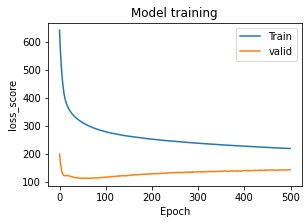

In [26]:
# Plot training & validation acc values
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training')
plt.ylabel('loss_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

In [27]:
test_predictions = model.predict(test_X)
test_dataset.obsm["predicted_gene"] = test_predictions

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


/scratch/imb/Xiao/.conda/envs/stimage/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/scratch/imb/Xiao/STimage/stimage/utils.py:106: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


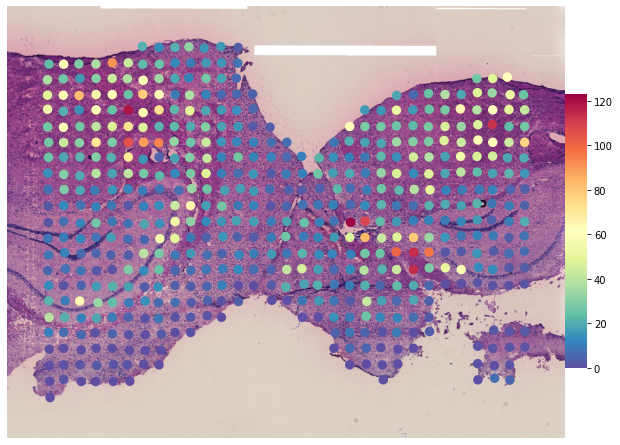


ENSMUSG00000031425:


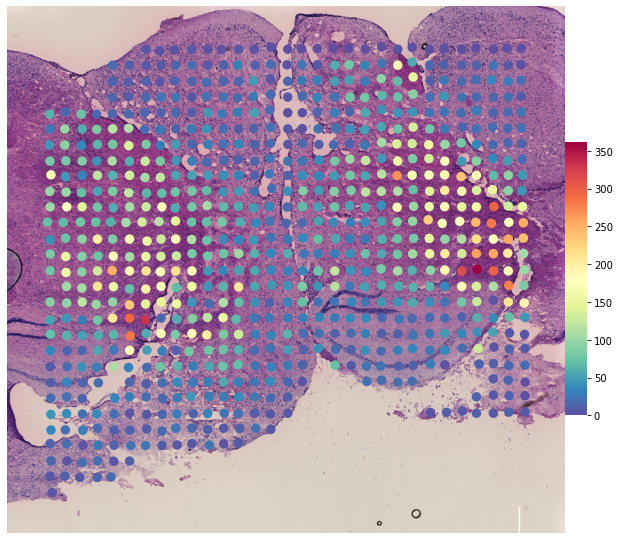

In [28]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset[test_dataset.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


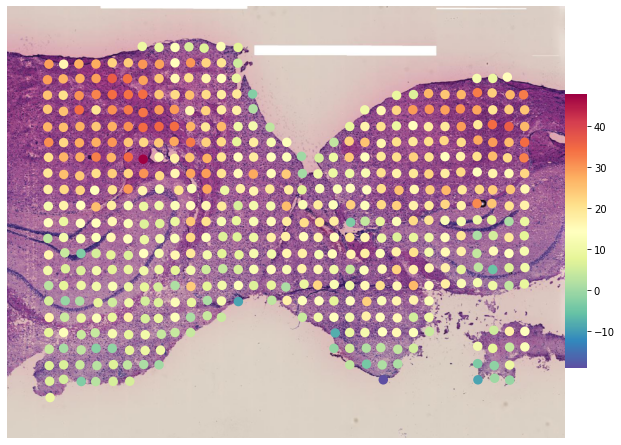


ENSMUSG00000031425:


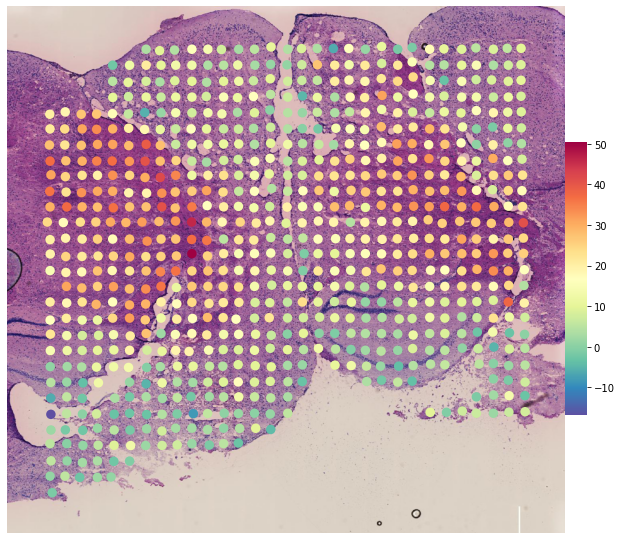

In [29]:
test_dataset_ = test_dataset[:,gene].copy()
test_dataset_.X = test_dataset_.obsm["predicted_gene"]
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset_[test_dataset_.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

In [23]:
def build_model():
    inputs = Input(shape=(2048,))
    outputs = Dropout(0.5)(inputs)
#     outputs = Dense(512,)(outputs)
#     outputs = Dense(256, activation='relu')(inputs)
#     outputs = Dropout(0.5)(outputs)
    outputs = Dense(2)(outputs)
    distribution_outputs = Lambda(negative_binomial_layer)(outputs)
    
    model = Model(inputs=inputs, outputs=distribution_outputs)

    optimizer = tf.keras.optimizers.RMSprop(0.0001)
#     optimizer = tf.keras.optimizers.Adam()

    model.compile(loss=negative_binomial_loss,
                optimizer=optimizer,
                metrics=[negative_binomial_loss])
    return model

In [24]:
model = build_model()

In [25]:
EPOCHS = 500

history = model.fit(
  train_X, train_Y, batch_size=100,
  epochs=EPOCHS, validation_data = (valid_X, valid_Y), validation_batch_size = 100)

Epoch 1/500
20/20 [==============================] - 1s 38ms/step - loss: 14.3240 - negative_binomial_loss: 14.3240 - val_loss: 3.8233 - val_negative_binomial_loss: 3.8233
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 9.0291 - negative_binomial_loss: 9.0291 - val_loss: 3.7171 - val_negative_binomial_loss: 3.7171
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 7.8410 - negative_binomial_loss: 7.8410 - val_loss: 3.6699 - val_negative_binomial_loss: 3.6699
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 6.6093 - negative_binomial_loss: 6.6093 - val_loss: 3.6050 - val_negative_binomial_loss: 3.6050
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 6.1028 - negative_binomial_loss: 6.1028 - val_loss: 3.6056 - val_negative_binomial_loss: 3.6056
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 5.7266 - negative_binomial_loss: 5.7266 - val_loss: 3.6281 - val_negative_binom

20/20 [==============================] - 0s 3ms/step - loss: 4.0586 - negative_binomial_loss: 4.0586 - val_loss: 3.2441 - val_negative_binomial_loss: 3.2441
Epoch 50/500
20/20 [==============================] - 0s 3ms/step - loss: 3.9872 - negative_binomial_loss: 3.9872 - val_loss: 3.2244 - val_negative_binomial_loss: 3.2244
Epoch 51/500
20/20 [==============================] - 0s 4ms/step - loss: 3.9496 - negative_binomial_loss: 3.9496 - val_loss: 3.2025 - val_negative_binomial_loss: 3.2025
Epoch 52/500
20/20 [==============================] - 0s 4ms/step - loss: 3.9267 - negative_binomial_loss: 3.9267 - val_loss: 3.2152 - val_negative_binomial_loss: 3.2152
Epoch 53/500
20/20 [==============================] - 0s 4ms/step - loss: 3.9832 - negative_binomial_loss: 3.9832 - val_loss: 3.2271 - val_negative_binomial_loss: 3.2271
Epoch 54/500
20/20 [==============================] - 0s 4ms/step - loss: 3.9308 - negative_binomial_loss: 3.9308 - val_loss: 3.2222 - val_negative_binomial_loss: 

20/20 [==============================] - 0s 4ms/step - loss: 3.7025 - negative_binomial_loss: 3.7025 - val_loss: 3.1646 - val_negative_binomial_loss: 3.1646
Epoch 98/500
20/20 [==============================] - 0s 3ms/step - loss: 3.7975 - negative_binomial_loss: 3.7975 - val_loss: 3.1575 - val_negative_binomial_loss: 3.1575
Epoch 99/500
20/20 [==============================] - 0s 4ms/step - loss: 3.7239 - negative_binomial_loss: 3.7239 - val_loss: 3.1665 - val_negative_binomial_loss: 3.1665
Epoch 100/500
20/20 [==============================] - 0s 3ms/step - loss: 3.7115 - negative_binomial_loss: 3.7115 - val_loss: 3.1584 - val_negative_binomial_loss: 3.1584
Epoch 101/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6730 - negative_binomial_loss: 3.6730 - val_loss: 3.1606 - val_negative_binomial_loss: 3.1606
Epoch 102/500
20/20 [==============================] - 0s 3ms/step - loss: 3.7102 - negative_binomial_loss: 3.7102 - val_loss: 3.2145 - val_negative_binomial_los

20/20 [==============================] - 0s 4ms/step - loss: 3.6287 - negative_binomial_loss: 3.6287 - val_loss: 3.1087 - val_negative_binomial_loss: 3.1087
Epoch 146/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6060 - negative_binomial_loss: 3.6060 - val_loss: 3.1636 - val_negative_binomial_loss: 3.1636
Epoch 147/500
20/20 [==============================] - 0s 3ms/step - loss: 3.6187 - negative_binomial_loss: 3.6187 - val_loss: 3.1693 - val_negative_binomial_loss: 3.1693
Epoch 148/500
20/20 [==============================] - 0s 3ms/step - loss: 3.5854 - negative_binomial_loss: 3.5854 - val_loss: 3.1823 - val_negative_binomial_loss: 3.1823
Epoch 149/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6420 - negative_binomial_loss: 3.6420 - val_loss: 3.1011 - val_negative_binomial_loss: 3.1011
Epoch 150/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6191 - negative_binomial_loss: 3.6191 - val_loss: 3.1362 - val_negative_binomial_l

Epoch 193/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5575 - negative_binomial_loss: 3.5575 - val_loss: 3.1158 - val_negative_binomial_loss: 3.1158
Epoch 194/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6528 - negative_binomial_loss: 3.6528 - val_loss: 3.1442 - val_negative_binomial_loss: 3.1442
Epoch 195/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5733 - negative_binomial_loss: 3.5733 - val_loss: 3.0984 - val_negative_binomial_loss: 3.0984
Epoch 196/500
20/20 [==============================] - 0s 5ms/step - loss: 3.6251 - negative_binomial_loss: 3.6251 - val_loss: 3.1354 - val_negative_binomial_loss: 3.1354
Epoch 197/500
20/20 [==============================] - 0s 5ms/step - loss: 3.6211 - negative_binomial_loss: 3.6211 - val_loss: 3.1861 - val_negative_binomial_loss: 3.1861
Epoch 198/500
20/20 [==============================] - 0s 3ms/step - loss: 3.6185 - negative_binomial_loss: 3.6185 - val_loss: 3.1298 - val_negat

Epoch 241/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5908 - negative_binomial_loss: 3.5908 - val_loss: 3.1583 - val_negative_binomial_loss: 3.1583
Epoch 242/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5523 - negative_binomial_loss: 3.5523 - val_loss: 3.1408 - val_negative_binomial_loss: 3.1408
Epoch 243/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5440 - negative_binomial_loss: 3.5440 - val_loss: 3.1799 - val_negative_binomial_loss: 3.1799
Epoch 244/500
20/20 [==============================] - 0s 3ms/step - loss: 3.5627 - negative_binomial_loss: 3.5627 - val_loss: 3.1301 - val_negative_binomial_loss: 3.1301
Epoch 245/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5216 - negative_binomial_loss: 3.5216 - val_loss: 3.1411 - val_negative_binomial_loss: 3.1411
Epoch 246/500
20/20 [==============================] - 0s 3ms/step - loss: 3.5672 - negative_binomial_loss: 3.5672 - val_loss: 3.1519 - val_negat

Epoch 289/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5451 - negative_binomial_loss: 3.5451 - val_loss: 3.1351 - val_negative_binomial_loss: 3.1351
Epoch 290/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5367 - negative_binomial_loss: 3.5367 - val_loss: 3.1115 - val_negative_binomial_loss: 3.1115
Epoch 291/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5265 - negative_binomial_loss: 3.5265 - val_loss: 3.1222 - val_negative_binomial_loss: 3.1222
Epoch 292/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5777 - negative_binomial_loss: 3.5777 - val_loss: 3.1342 - val_negative_binomial_loss: 3.1342
Epoch 293/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5749 - negative_binomial_loss: 3.5749 - val_loss: 3.1142 - val_negative_binomial_loss: 3.1142
Epoch 294/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5243 - negative_binomial_loss: 3.5243 - val_loss: 3.1330 - val_negat

Epoch 337/500
20/20 [==============================] - 0s 4ms/step - loss: 3.4938 - negative_binomial_loss: 3.4938 - val_loss: 3.1198 - val_negative_binomial_loss: 3.1198
Epoch 338/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5070 - negative_binomial_loss: 3.5070 - val_loss: 3.1118 - val_negative_binomial_loss: 3.1118
Epoch 339/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5204 - negative_binomial_loss: 3.5204 - val_loss: 3.1487 - val_negative_binomial_loss: 3.1487
Epoch 340/500
20/20 [==============================] - 0s 3ms/step - loss: 3.5594 - negative_binomial_loss: 3.5594 - val_loss: 3.1393 - val_negative_binomial_loss: 3.1393
Epoch 341/500
20/20 [==============================] - 0s 3ms/step - loss: 3.5398 - negative_binomial_loss: 3.5398 - val_loss: 3.1469 - val_negative_binomial_loss: 3.1469
Epoch 342/500
20/20 [==============================] - 0s 3ms/step - loss: 3.5905 - negative_binomial_loss: 3.5905 - val_loss: 3.1283 - val_negat

Epoch 385/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5753 - negative_binomial_loss: 3.5753 - val_loss: 3.1143 - val_negative_binomial_loss: 3.1143
Epoch 386/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5585 - negative_binomial_loss: 3.5585 - val_loss: 3.1364 - val_negative_binomial_loss: 3.1364
Epoch 387/500
20/20 [==============================] - 0s 4ms/step - loss: 3.4979 - negative_binomial_loss: 3.4979 - val_loss: 3.0865 - val_negative_binomial_loss: 3.0865
Epoch 388/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5538 - negative_binomial_loss: 3.5538 - val_loss: 3.1047 - val_negative_binomial_loss: 3.1047
Epoch 389/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5119 - negative_binomial_loss: 3.5119 - val_loss: 3.1130 - val_negative_binomial_loss: 3.1130
Epoch 390/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5027 - negative_binomial_loss: 3.5027 - val_loss: 3.1331 - val_negat

Epoch 433/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5128 - negative_binomial_loss: 3.5128 - val_loss: 3.1239 - val_negative_binomial_loss: 3.1239
Epoch 434/500
20/20 [==============================] - 0s 5ms/step - loss: 3.4708 - negative_binomial_loss: 3.4708 - val_loss: 3.1396 - val_negative_binomial_loss: 3.1396
Epoch 435/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5121 - negative_binomial_loss: 3.5121 - val_loss: 3.1361 - val_negative_binomial_loss: 3.1361
Epoch 436/500
20/20 [==============================] - 0s 3ms/step - loss: 3.5397 - negative_binomial_loss: 3.5397 - val_loss: 3.1205 - val_negative_binomial_loss: 3.1205
Epoch 437/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5077 - negative_binomial_loss: 3.5077 - val_loss: 3.1216 - val_negative_binomial_loss: 3.1216
Epoch 438/500
20/20 [==============================] - 0s 3ms/step - loss: 3.4890 - negative_binomial_loss: 3.4890 - val_loss: 3.1201 - val_negat

Epoch 481/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5536 - negative_binomial_loss: 3.5536 - val_loss: 3.1701 - val_negative_binomial_loss: 3.1701
Epoch 482/500
20/20 [==============================] - 0s 4ms/step - loss: 3.4940 - negative_binomial_loss: 3.4940 - val_loss: 3.1911 - val_negative_binomial_loss: 3.1911
Epoch 483/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5239 - negative_binomial_loss: 3.5239 - val_loss: 3.1367 - val_negative_binomial_loss: 3.1367
Epoch 484/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5971 - negative_binomial_loss: 3.5971 - val_loss: 3.1214 - val_negative_binomial_loss: 3.1214
Epoch 485/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5070 - negative_binomial_loss: 3.5070 - val_loss: 3.1388 - val_negative_binomial_loss: 3.1388
Epoch 486/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5171 - negative_binomial_loss: 3.5171 - val_loss: 3.1229 - val_negat

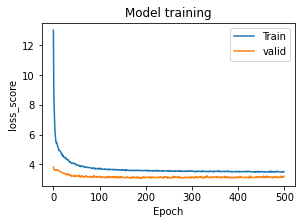

In [26]:
# Plot training & validation acc values
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training')
plt.ylabel('loss_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

In [27]:
test_predictions = model.predict(test_X)

In [28]:
from scipy.stats import nbinom
n = test_predictions[:,0]; p = test_predictions[:,1]
y_pred = nbinom.mean(n,p)
test_dataset.obsm["predicted_gene"] = y_pred

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


/scratch/imb/Xiao/.conda/envs/stimage/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/scratch/imb/Xiao/STimage/stimage/utils.py:113: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


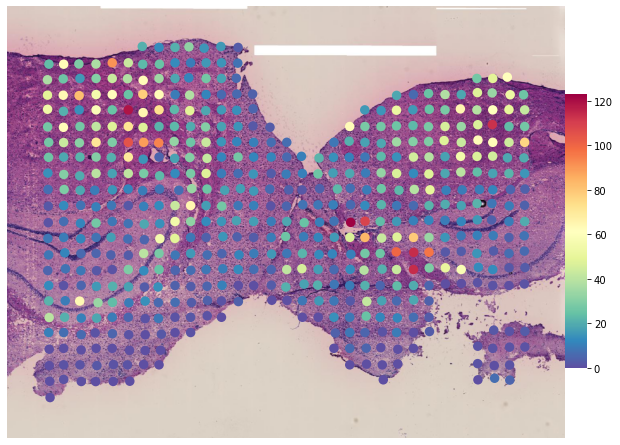


ENSMUSG00000031425:


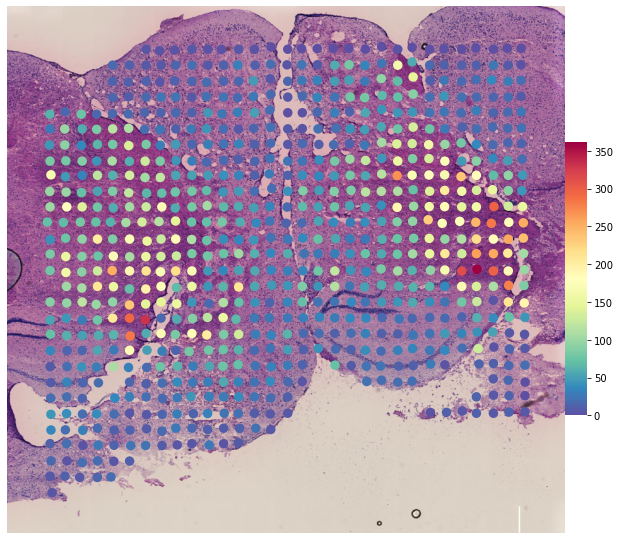

In [29]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset[test_dataset.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

In [30]:
test_dataset_ = test_dataset[:,gene].copy()
test_dataset_.X = test_dataset_.obsm["predicted_gene"]

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


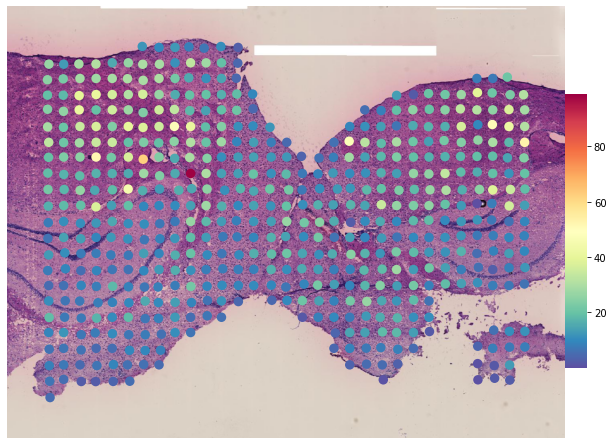


ENSMUSG00000031425:


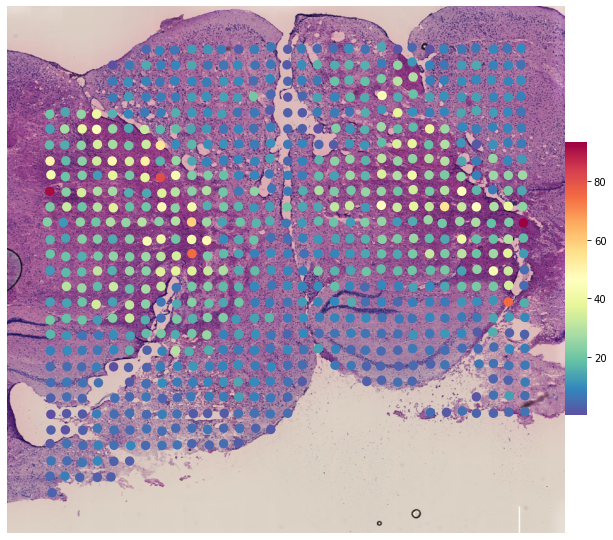

In [31]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset_[test_dataset_.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

In [32]:
for adata in [
    test_dataset_
]:
#     count_df = adata.to_df()
#     count_df[count_df <=1] = 0
#     count_df[count_df >1] = 1
#     adata.X = count_df
#     adata[:,gene_list]
#     st.pp.filter_genes(adata,min_cells=1)
#     st.pp.normalize_total(adata)
    st.pp.log1p(adata)
#     st.pp.scale(adata)

Log transformation step is finished in adata.X


Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


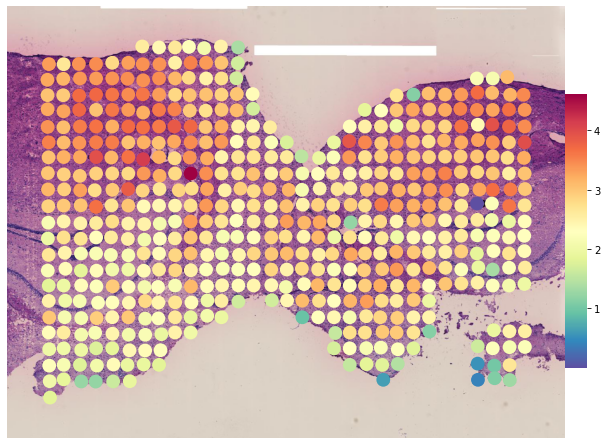


ENSMUSG00000031425:


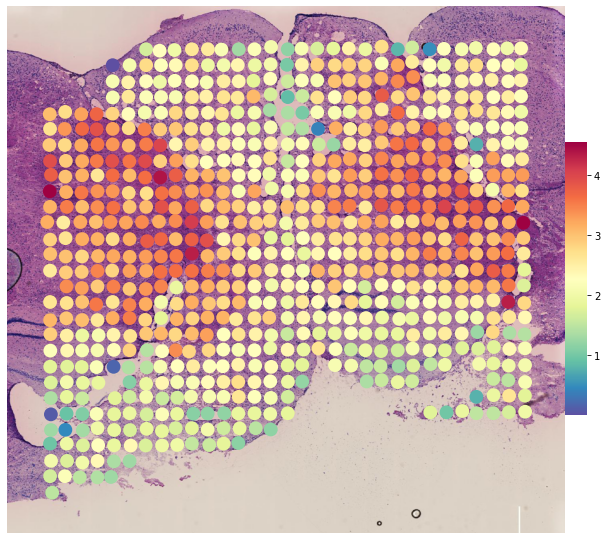

In [37]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset_[test_dataset_.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=190, library_id=library)

# correlation

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
test_Y_ = test_Y.copy()

In [79]:
y_pred

array([33.66786575, 49.94800186, 26.72623444, ..., 17.64559937,
       57.79507828, 17.3764782 ])

In [81]:
test_Y_ = test_Y_.ravel()

In [91]:
df = pd.DataFrame({"true":test_Y_, "pred":y_pred})

In [94]:
# df = df.sort_values(by=['ENSMUSG00000031425'])
df = np.log(df+1)

Text(3, 5, '$R^2:0.20$')

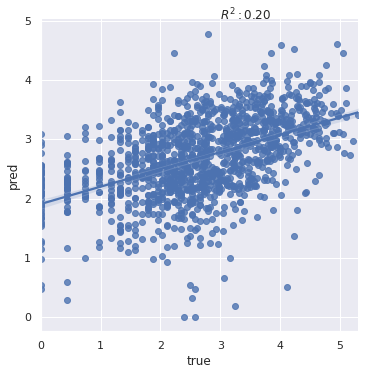

In [95]:
from scipy import stats

r2 = stats.pearsonr(test_Y_, 
                    y_pred)[0] ** 2
sns.set_theme()
g = sns.lmplot(data=df,
    x="true", y="pred",
    height=5, legend=True
)
# g.set(ylim=(0, 360), xlim=(0,360))

g.set_axis_labels("true", "pred")
plt.annotate(r'$R^2:{0:.2f}$'.format(r2),
            (3, 5))